In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys
sys.path.append("../")

from utils.preprocessing import *

In [3]:
pose_csv = '../videos/video_2DLC_resnet50_bottomup_clearSep21shuffle1_1030000.csv'
pose_df = pd.read_csv(pose_csv, header=[0, 1, 2], index_col=0)
pose = np.array([pose_df.iloc[:, c] for c in np.arange(pose_df.shape[1]) if not np.mod(c, 3)==2]).T
print(pose.shape)

(7300, 12)


### original data table

In [4]:
pose_df[::3].head(40)

scorer    DLC_resnet50_bottomup_clearSep21shuffle1_1030000              \
bodyparts                                            snout               
coords                                                   x           y   
0                                               606.874329  227.331711   
3                                               609.001831  232.970673   
6                                               607.469177  240.823303   
9                                               614.910950  237.861465   
12                                              611.601318  258.393677   
15                                              612.857544  267.140411   
18                                              611.139465  273.467102   
21                                              623.945679  274.403717   
24                                              637.099548  281.449219   
27                                              635.070312  285.567139   
30                                              631.703125  294.446320   
33                                              621.039795  302.373108   
36                                              611.134399  302.600250   
39                                              614.625793  291.069672   
42                                              606.817932  283.455078   
45                                              596.559875  281.607483   
48                                              594.670837  282.826202   
51                                              593.090698  282.186676   
54                                              591.363037  274.635040   
57                                              601.858704  278.280396   
60                                              581.947021  291.728180   
63                                              568.755005  297.178986   
66                                              541.448669  306.189331   
69                                              512.165100  291.837097   
72                                              509.310760  288.453308   
75                                              502.481384  280.380249   
78                                              510.678223  277.369598   
81                                              512.372192  282.555634   
84                                              511.770721  282.698608   
87                                              510.813446  284.145752   
90                                              511.339417  285.484802   
93                                              512.347412  284.217621   
96                                              512.459106  284.510498   
99                                              511.169708  287.037506   
102                                             510.759277  286.453186   
105                                             517.015198  267.954956   
108                                             516.924377  242.110611   
111                                             514.104797  207.126923   
114                                             513.049438  185.770386   
117                                             504.472656  170.960632   

scorer                                                                  \
bodyparts            right-forepaw                        left-forepaw   
coords    likelihood             x           y likelihood            x   
0           0.999982    628.938904  217.915115   0.999011   612.005798   
3           0.934005    636.560913  211.618515   0.995981   615.082092   
6           0.002588    615.078369  193.946869   0.908265   616.475586   
9           0.999090    628.116089  215.025284   0.904312   613.645325   
12          0.998129    641.058960  214.954147   0.999992   612.646423   
15          0.989421    634.524353  247.530045   0.999969   611.217896   
18          0.183802    629.755676  252.151474   0.999956   611.828979   
21          0.999999    627.909790  254.572754   0.999999   611.130005   
24 

### after removing likelihood and headers

In [5]:
pose[:5, :]

array([[606.87432861, 227.33171082, 628.93890381, 217.91511536,
        612.00579834, 187.18356323, 685.7769165 , 199.1756134 ,
        644.06622314, 160.71043396, 682.22869873, 165.80747986],
       [606.13006592, 226.17329407, 629.02825928, 218.00212097,
        613.61218262, 187.19915771, 686.29907227, 200.76268005,
        646.0401001 , 160.64178467, 680.99530029, 167.5422821 ],
       [607.32611084, 230.76202393, 639.54974365, 212.86413574,
        614.12518311, 187.06077576, 685.84863281, 202.91590881,
        646.31671143, 160.33610535, 681.50732422, 167.28639221],
       [609.00183105, 232.97067261, 636.56091309, 211.61851501,
        615.08209229, 186.72814941, 685.27185059, 202.91346741,
        646.48675537, 160.58050537, 680.49023438, 168.00151062],
       [612.24060059, 233.37568665, 635.10736084, 211.85411072,
        615.63964844, 187.94837952, 685.11376953, 202.43577576,
        646.19366455, 160.30377197, 680.30218506, 168.65596008]])

### plot

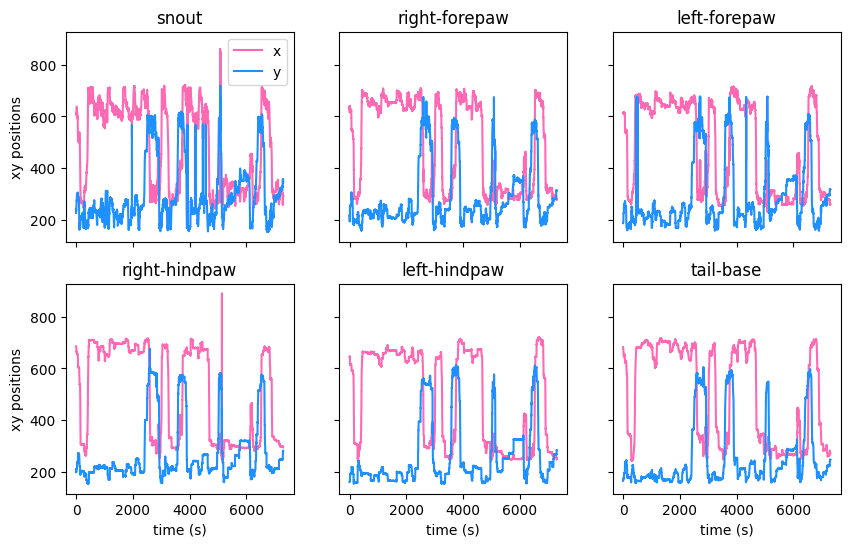

In [6]:
# plot all example files
bodyparts_names = ['snout',
                   'right-forepaw', 'left-forepaw', 
                   'right-hindpaw', 'left-hindpaw', 
                   'tail-base']
cols = 3
rows = int(np.ceil(int(pose.shape[1]/2)/cols))
count = 0
fig, ax = plt.subplots(rows, cols, figsize=(10, 6), sharex=True, sharey=True)
for row in range(rows):
    for col in range(cols):
        try:
            ax[row, col].plot(pose[:, 2*count], c='hotpink', label='x')
            ax[row, col].plot(pose[:, 2*count+1], c='dodgerblue', label='y')
            if col == 0 and row == 0:
                ax[row, col].legend()
            ax[row, col].set_title(bodyparts_names[count])
            if col == 0:
                ax[row, col].set_ylabel('xy positions')

            if row == rows-1:
                ax[row, col].set_xlabel('time (s)')
            count += 1
        except IndexError:
            pass

plt.show()



### save processed pose file 

In [7]:
np.save('../processed_data/pose_video_2.npy', pose)